## Questions for Katarina

#### Strategy for matching call data to invoice data based on first name and last name
- Call Data: first letter of first name, last name
- Invoice Data: first name, last name
- Dates vary due to billing cycle and time to complete job

#### Model 1: Predicting 'Amount After Discount' based on invoice data
- Attributes: Sales Type, Qty, Item Code, Item Description, Job Type, Location PC
- Item Description has allot that needs to be cleaned and also seems to be written out on a per job basis by whoever did the job so there are no classes its all unique text entries

#### Model 2: Predicting all attributes for first model based on call data
- Using the transcribed call data and the following attributes: Duration, Type, Call Status, Address (if they have it)
- Is this too abstract? is there a better way?

#### Additional Considerations:
- 'Amount After Discount' delta depending on tech lead / person assigned to the job
- What is best practice for back end?

## Questions for John
- what is the typical difference between prospet and invoice date?


## Data Overview

Loading the data

In [183]:
CALL_PATH = "datasets/2018_Finan_Call_data.csv"
INVOICE_PATH = "datasets/2018_Finan_Invoice_data.csv"

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
call_data = pd.read_csv(CALL_PATH)
invoice_data = pd.read_csv(INVOICE_PATH)

In [184]:
call_data.head()

,Date,Time,Employee,Location,Extension Routing,Ad Source,Routed Type,Result,Duration,Status,Tracking Number,Caller Number,Target Number,Missed Opp,Prospect/Non-Prospect,Call Status,Call Id,Audio URL,Campaign Id,Campaign Name,Location Code,Location Id,First Name,Last Name,Street Address,City,State,Zip Code,Country,Appointment Set,Appointment Date and Time,Call Alert Status
0,02/08/2018,10:32:56 AM,NaN,Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,"1,747",Unreviewed,2262133833,5196607460,5194550453,NaN,General Business,Other,668630889,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
1,04/23/2018,8:37:56 AM,Maria Bethke - CC(11),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,"1,542",Reviewed,2262133833,2267772613,5194550453,NaN,Current Customer,Current Customer,1070927132,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
2,01/22/2018,3:05:09 PM,John Finan(14),Finan Home Service - Nexstar,NaN,Lennox CAP/Landing Page-Landing Page,NaN,Connected,"1,356",Unreviewed,2262133827,5196579335,5194550453,Y,Service,New Prospect,1086459588,https://reports.callsource.com/assets/audio/20...,11454461,NaN,4728548,4728548,V,CLARK,23 TANGLEWOOD AVE,LONDON ON,NaN,NaN,Canada,No,NaN,Sales Alert
3,08/07/2018,8:43:05 AM,Maria Bethke - CC(11),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,"1,307",Unreviewed,2262133833,5192044686,5194550453,N,Service,New Prospect,1052181209,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Yes,08/07/2018 7:00 AM,NaN
4,03/06/2018,10:01:31 AM,NaN,Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,"1,283",Unreviewed,2262133833,5196607460,5194550453,NaN,General Business,Vendor/Distributor,674853553,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN


In [185]:
invoice_data.head()

,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location Last Name,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC
0,2018-02-01,2018-02-01,102570,102570,NaN,AGRREN,1.0,PT,Precision Tuneup (#401428),NaN,$167.64,Agreement,NaN,NaN,NaN,18,NaN,NaN,YP,Phonebook,NaN,345859,Henderson,Marg,NaN,16 Chapple Hill Road,London,ON,N6G 2H3,Henderson,Marg,NaN,16 Chapple Hill Road,London,ON,N6G 2H3
1,2018-08-01,2018-08-01,129225,129225,MIKEJ,INST,1.0,GENINST,Deposit for water heater.,NaN,$234.21,Job,247574,RYANC,RENO,19,REF,Referral,REF,Referral,NaN,346644,Windibanks,Kurt,NaN,10952 Oxbow Drive,Komoka,ON,N0L 1R0,Windibanks,Kurt,NaN,10952 Oxbow Drive,Komoka,ON,N0L 1R0
2,2018-04-01,2018-04-01,110472,110472,NaN,AGRNEW,1.0,PT2,Deposit on Precision Tuneup - FAC (#401663),NaN,$13.97,Agreement,NaN,NaN,NaN,18,NaN,NaN,REAL,Other,NaN,347779,Cassan,Douglas,NaN,54 Runnymede Crescent,London,ON,N6G 1Z8,Cassan,Douglas,NaN,54 Runnymede Crescent,London,ON,N6G 1Z8
3,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A panel,NaN,"$1,621.68",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7
4,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A meter base,NaN,"$1,234.97",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7


### Cleaning the Call Data

Getting rid of useless columns

In [186]:
call_data = call_data.drop(["Location", "Extension Routing", "Ad Source", "Routed Type", "Result", "Campaign Name", "Location Code", "Location Id", "State"], axis=1)


In [187]:
call_data = call_data.rename(columns={'Prospect/Non-Prospect': 'Type'})
call_data.head()


,Date,Time,Employee,Duration,Status,Tracking Number,Caller Number,Target Number,Missed Opp,Type,Call Status,Call Id,Audio URL,Campaign Id,First Name,Last Name,Street Address,City,Zip Code,Country,Appointment Set,Appointment Date and Time,Call Alert Status
0,02/08/2018,10:32:56 AM,NaN,"1,747",Unreviewed,2262133833,5196607460,5194550453,NaN,General Business,Other,668630889,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
1,04/23/2018,8:37:56 AM,Maria Bethke - CC(11),"1,542",Reviewed,2262133833,2267772613,5194550453,NaN,Current Customer,Current Customer,1070927132,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
2,01/22/2018,3:05:09 PM,John Finan(14),"1,356",Unreviewed,2262133827,5196579335,5194550453,Y,Service,New Prospect,1086459588,https://reports.callsource.com/assets/audio/20...,11454461,V,CLARK,23 TANGLEWOOD AVE,LONDON ON,NaN,Canada,No,NaN,Sales Alert
3,08/07/2018,8:43:05 AM,Maria Bethke - CC(11),"1,307",Unreviewed,2262133833,5192044686,5194550453,N,Service,New Prospect,1052181209,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,Yes,08/07/2018 7:00 AM,NaN
4,03/06/2018,10:01:31 AM,NaN,"1,283",Unreviewed,2262133833,5196607460,5194550453,NaN,General Business,Vendor/Distributor,674853553,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN


Split out columns I'm not sure about:
- Status
- TracKing Number
- Target Number
- Missed Opp 
- Campaign Id 
- Appointment Set 
- Appointment Date and Time
- Call Alert Status

In [188]:
unsure_call_data = call_data.filter(['Status', 'Tracking Number', 'Target Number', 'Missed Opp', 'Campaign Id', 'Appointment Set', 'Appointment Date and Time', 'Call Alert Status'], axis=1)
unsure_call_data.head()

,Status,Tracking Number,Target Number,Missed Opp,Campaign Id,Appointment Set,Appointment Date and Time,Call Alert Status
0,Unreviewed,2262133833,5194550453,NaN,11454451,NaN,NaN,NaN
1,Reviewed,2262133833,5194550453,NaN,11454451,NaN,NaN,NaN
2,Unreviewed,2262133827,5194550453,Y,11454461,No,NaN,Sales Alert
3,Unreviewed,2262133833,5194550453,N,11454451,Yes,08/07/2018 7:00 AM,NaN
4,Unreviewed,2262133833,5194550453,NaN,11454451,NaN,NaN,NaN


In [189]:
call_data = call_data.drop(['Status', 'Tracking Number', 'Target Number', 'Missed Opp', 'Campaign Id', 'Appointment Set', 'Appointment Date and Time', 'Call Alert Status'], axis=1)
call_data.head()

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country
0,02/08/2018,10:32:56 AM,NaN,"1,747",5196607460,General Business,Other,668630889,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
1,04/23/2018,8:37:56 AM,Maria Bethke - CC(11),"1,542",2267772613,Current Customer,Current Customer,1070927132,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
2,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1086459588,https://reports.callsource.com/assets/audio/20...,V,CLARK,23 TANGLEWOOD AVE,LONDON ON,NaN,Canada
3,08/07/2018,8:43:05 AM,Maria Bethke - CC(11),"1,307",5192044686,Service,New Prospect,1052181209,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
4,03/06/2018,10:01:31 AM,NaN,"1,283",5196607460,General Business,Vendor/Distributor,674853553,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada


In [190]:
call_data.shape

(2428, 15)

How many entries actually have no fields missing?

In [191]:
full_call_data = call_data.dropna()

In [192]:
full_call_data.shape

(133, 15)

Okay not great, how many entires have first names and last names or an address?

In [193]:
named_call_data = call_data.dropna(subset=['First Name', 'Last Name'])
address_call_data = call_data.dropna(subset=['Street Address'])

In [194]:
named_call_data.shape

(596, 15)

In [195]:
address_call_data.shape

(762, 15)

lets combine these two

In [196]:
tagged_call_data = pd.concat([named_call_data, address_call_data]).drop_duplicates().reset_index(drop=True)
tagged_call_data.shape

(778, 15)

Alright now how many of these are prospects?

In [197]:
# drop missing attributes for Type
temp = tagged_call_data.dropna(subset=['Type'])
temp.shape

(736, 15)

In [198]:
# drop General Business calls and Hang up
temp=temp[tagged_call_data.Type != 'General Business']
temp=temp[tagged_call_data.Type != 'Hang-up']
temp.shape

c:\users\yanick\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\yanick\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(571, 15)

Okay that should be enough

In [199]:
ref_call = temp
ref_call.head()

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country
0,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1086459588,https://reports.callsource.com/assets/audio/20...,V,CLARK,23 TANGLEWOOD AVE,LONDON ON,NaN,Canada
1,06/04/2018,1:00:54 PM,Maria Bethke - CC(11),"1,048",5196612111,Service,New Prospect,1063661479,https://reports.callsource.com/assets/audio/20...,GEORGE,MALLOY,1622 KRIEBEL MILL RD,COLLEGEVILLE,19426-1430,Canada
2,08/29/2018,3:04:36 PM,Mike Jarvis(12),950,5196457851,Service,Existing Customer Prospect,1048156032,https://reports.callsource.com/assets/audio/20...,C,BROWN,23-656 KING ST,LONDON,N5W2W9,Canada
4,07/16/2018,10:07:30 AM,Maria Bethke - CC(11),745,5196412922,Sales,New Prospect,706143443,https://reports.callsource.com/assets/audio/20...,M,AGNEW,222 MCMASTER DR,LONDON ON,NaN,Canada
5,03/05/2018,9:29:30 AM,NaN,697,5194328168,Current Customer,Current Customer,674503026,https://reports.callsource.com/assets/audio/20...,A,HARDY,7 GLENVIEW CRES,LONDON ON,NaN,Canada


### Linking Call Data to Invoice Data

In [200]:
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 36 columns):
Inv Date                     8700 non-null object
Post Date                    8700 non-null object
Billing Acct                 8700 non-null int64
Location ID                  8700 non-null int64
Sales Rep                    4842 non-null object
Sale Type                    8700 non-null object
Qty                          8700 non-null float64
Item Code                    8700 non-null object
Item Description             8700 non-null object
Discount                     562 non-null object
Amount After Discount        7626 non-null object
Unnamed: 11                  8700 non-null object
Job #                        4525 non-null object
Tech                         4523 non-null object
Job Type                     4525 non-null object
Dept                         8700 non-null int64
Job Lead Source              4435 non-null object
Job Lead source Type         4435 non-null obj

In [201]:
(invoice_data['Billing last name'] == invoice_data['Location Last Name']).sum()


8106

In [202]:
(invoice_data['Billing first name'] == invoice_data['Location First name']).sum()

8016

Alright so most billing and location names match - we'll go with location name since it's more likely the person that called in
Now lets create an array with first and last names of our callers

In [203]:
import math

def addr_splt(a):
    new = ''
    if(isinstance(a,str)):
        spl = a.split()
        if(len(spl)>2):
            new = spl[0] + spl[1]
    else:
        new = 'None'
    return(new)
        
ref_call['Street Address'] = ref_call['Street Address'].apply(addr_splt)
invoice_data['Location Address'] = invoice_data['Location Address'].apply(addr_splt)

invoice_data.head()

,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location Last Name,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC
0,2018-02-01,2018-02-01,102570,102570,NaN,AGRREN,1.0,PT,Precision Tuneup (#401428),NaN,$167.64,Agreement,NaN,NaN,NaN,18,NaN,NaN,YP,Phonebook,NaN,345859,Henderson,Marg,NaN,16 Chapple Hill Road,London,ON,N6G 2H3,Henderson,Marg,NaN,16Chapple,London,ON,N6G 2H3
1,2018-08-01,2018-08-01,129225,129225,MIKEJ,INST,1.0,GENINST,Deposit for water heater.,NaN,$234.21,Job,247574,RYANC,RENO,19,REF,Referral,REF,Referral,NaN,346644,Windibanks,Kurt,NaN,10952 Oxbow Drive,Komoka,ON,N0L 1R0,Windibanks,Kurt,NaN,10952Oxbow,Komoka,ON,N0L 1R0
2,2018-04-01,2018-04-01,110472,110472,NaN,AGRNEW,1.0,PT2,Deposit on Precision Tuneup - FAC (#401663),NaN,$13.97,Agreement,NaN,NaN,NaN,18,NaN,NaN,REAL,Other,NaN,347779,Cassan,Douglas,NaN,54 Runnymede Crescent,London,ON,N6G 1Z8,Cassan,Douglas,NaN,54Runnymede,London,ON,N6G 1Z8
3,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A panel,NaN,"$1,621.68",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023Apache,London,ON,N5V 2V7
4,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A meter base,NaN,"$1,234.97",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023Apache,London,ON,N5V 2V7


In [204]:
#outer join on last name
invoice_test = invoice_data
invoice_test['Location Last Name'] = invoice_test['Location Last Name'].str.upper()
invoice_test['Location Address'] = invoice_test['Location Address'].str.upper()
invoice_test.rename(columns={'Location Last Name':'Last Name'}, inplace=True)
invoice_test.rename(columns={'Location Address': 'Street Address'}, inplace=True)
merged_last_name = pd.merge(ref_call, invoice_test, how='outer', on=['Last Name'])
merged_address = pd.merge(ref_call, invoice_test, how='outer', on=['Street Address'])

In [205]:
merged = pd.concat([merged_last_name, merged_address], sort=False).drop_duplicates().reset_index(drop=True)
merged.head()

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address_x,City,Zip Code,Country,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location First name,Location Compnay Name,Street Address_y,Location City,Loccation Provingce,Location PC,Last Name_x,Street Address,Last Name_y
0,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1.086460e+09,https://reports.callsource.com/assets/audio/20...,V,CLARK,23TANGLEWOOD,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,117226.0,117226.0,NaN,AGRNEW,1.0,SC-FUR,Deposit on System Check - Furnace (#402267),NaN,$8.99,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349007.0,Scott,David,NaN,96 Hawthorne Road,London,ON,N6G 2W8,Michael,NaN,96HAWTHORNE,London,ON,N6G 2W8,NaN,NaN,NaN
1,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1.086460e+09,https://reports.callsource.com/assets/audio/20...,V,CLARK,23TANGLEWOOD,LONDON ON,NaN,Canada,2018-02-01,2018-02-01,129694.0,117226.0,NaN,AGRPB,1.0,SC-FUR,Billing for System Check - Furnace (#402267),NaN,$8.24,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349577.0,Clark,Michael,NaN,96 Hawthorne Road,London,ON,N6G 2W8,Michael,NaN,96HAWTHORNE,London,ON,N6G 2W8,NaN,NaN,NaN
2,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1.086460e+09,https://reports.callsource.com/assets/audio/20...,V,CLARK,23TANGLEWOOD,LONDON ON,NaN,Canada,2018-02-01,2018-02-01,129694.0,117226.0,NaN,MISC,1.0,GENMISC,Other Cost,NaN,$0.75,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349577.0,Clark,Michael,NaN,96 Hawthorne Road,London,ON,N6G 2W8,Michael,NaN,96HAWTHORNE,London,ON,N6G 2W8,NaN,NaN,NaN
3,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1.086460e+09,https://reports.callsource.com/assets/audio/20...,V,CLARK,23TANGLEWOOD,LONDON ON,NaN,Canada,2018-04-10,2018-04-10,128291.0,128291.0,CHRLES,SERV,1.0,GENLABOR,Labor Cost,NaN,NaN,Job,251423,CHRLES,HVAC,0.0,REP,Other,HDSth,Other,NaN,350704.0,Clark,Aaron,NaN,45 Burslem Street,London,ON,N5W 2V6,Aaron,NaN,45BURSLEM,London,ON,N5W 2V6,NaN,NaN,NaN
4,01/22/2018,3:05:09 PM,John Finan(14),"1,356",5196579335,Service,New Prospect,1.086460e+09,https://reports.callsource.com/assets/audio/20...,V,CLARK,23TANGLEWOOD,LONDON ON,NaN,Canada,2018-05-03,2018-05-03,128291.0,128291.0,CHRLES,SERV,1.0,GENLABOR,Labor Cost 0.25,NaN,$88.00,Job,251942,CHRLES,HVAC,18.0,REP,Other,HDSth,Other,NaN,350920.0,Clark,Aaron,NaN,45 Burslem Street,London,ON,N5W 2V6,Aaron,NaN,45BURSLEM,London,ON,N5W 2V6,NaN,NaN,NaN


In [206]:
merged = merged.dropna(subset=['Audio URL'])
merged = merged.dropna(subset=['Item Code'])

# if we can get addresses to work then we can refine this
# merged = merged.dropna(subset=['Last Name'])
# merged = merged.dropna(subset=['First Name'])

merged['Date'] = pd.to_datetime(merged['Date'])
merged['Inv Date'] = pd.to_datetime(merged['Inv Date'])
merged['Location First name'] = merged['Location First name'].str.upper()

In [207]:
# create a sparse matrix
# from scipy.sparse import csr_matrix
# sparse_merged = csr_matrix(merged)

merged['Match'] = np.where((((merged['Street Address_x'] == merged['Street Address_y']) | (merged['First Name'] == merged['Location First name']) | (merged['First Name'].str[0] == merged['Location First name'].str[0]))), 1, 0)
#  & (merged['Date'] < merged['Inv Date'])


# merged['Match'] = np.where((((merged['First Name'] == merged['Location First name']) | (merged['First Name'].str[0] == merged['Location First name'].str[0]) | (merged['Street Address_x'] == merged['Street Address_y'])) & (merged['Date'] < merged['Inv Date'])), True, False)
merged.shape

(42170, 54)

In [208]:
print((merged['Match']==1).sum())
print((merged['Match']==0).sum())

2392
39778


In [209]:
merged_unique = merged.drop_duplicates(subset=['Call Id'], keep='first', inplace=False)
print((merged_unique['Match']==1).sum())
print((merged_unique['Match']==0).sum())

148
250


In [210]:
merged_unique.shape

(398, 54)

## Export Data For Group Use

In [211]:
# merged.to_csv("datasets/merged.csv")
# merged_unique.to_csv("merged_unique.csv")

In [212]:
tr_processing = merged_unique
for x in range(5):
    tr_processing = pd.concat([merged_unique, tr_processing])

tr_processing = tr_processing.sort_values(by=['Call Id'])
# tr_processing.to_csv("datasets/tr_processing.csv")

## Create Training Data

#### Keep only necessary attributes

In [213]:
#train_data for first model
# train_data = merged_unique.loc[:, merged_unique.columns.intersection(['Date', 'Time', 'Duration', 'Type', 'Call Status', 'Call Id', 'Match'])]

# train_data for second model
train_data = merged.loc[:, merged.columns.intersection(['Date', 'Time', 'Duration', 'Type', 'Call Status', 'Call Id', 'Match', 'Amount After Discount'])]
train_data = train_data.dropna(subset=["Amount After Discount"])
train_data = train_data[train_data.Match == 1]

# converting dollar string to float for calculations
train_data["Amount After Discount"] = train_data["Amount After Discount"].replace('[\$,]', '', regex=True).astype(float)

# function that sums the invoice entries per call
def sum_invoice(data):
    invoice_sum = []
    for i, x in data.iterrows():
        total = train_data.loc[train_data["Call Id"] == x["Call Id"], "Amount After Discount"].sum()
        invoice_sum.append(total)
    return invoice_sum
# function that assigns classification based on invoice total
def class_invoice(data):
    class_list = []
    for i, x in data.iterrows():
        total = train_data.loc[train_data["Call Id"] == x["Call Id"], "Amount After Discount"].sum()
        if((total>=0) & (total<1000)):
            class_list.append(0)
        elif((total>=1000) & (total<5000)):
            class_list.append(1)
        elif(total>=5000):
            class_list.append(2)
        else:
            class_list.append(0)
    return class_list

train_data['V_Range'] = class_invoice(train_data)
train_data['Amount After Discount'] = sum_invoice(train_data)

# it works!!!
train_data = train_data.drop_duplicates(subset=['Call Id'], keep='first', inplace=False)

train_data = train_data.drop(['Amount After Discount', 'Match'], axis=1)

In [214]:
train_data.head()

,Date,Time,Duration,Type,Call Status,Call Id,V_Range
18,2018-11-23,2:55:00 PM,285,Current Customer,Current Customer,1.033596e+09,1
40,2018-11-10,1:26:36 PM,84,Current Customer,Answering Service/Call Center,1.035662e+09,1
53,2018-08-29,3:04:36 PM,950,Service,Existing Customer Prospect,1.048156e+09,0
96,2018-03-05,9:29:30 AM,697,Current Customer,Current Customer,6.745030e+08,2
110,2018-03-05,9:50:35 AM,47,Other,Repeat Caller,6.745144e+08,2


In [215]:
train_data.head()
train_data.shape

(182, 7)

#### Turning Date into a feature

In [216]:
from datetime import date
from datetime import datetime

dates = train_data['Date']
times = train_data['Time']

weekdays = []
months = []

for d in dates:
    weekdays.append(d.weekday())
    months.append(d.month)
    
hours = []

for t in times:
    h = t.split(':')[0]
    if(t[-2:] == "PM"):
        h = int(h) + 12
    hours.append(float(h))
        
    
train_data['Weekday'] = weekdays
train_data['Month'] = months
train_data['Hour'] = hours

train_data.head()

,Date,Time,Duration,Type,Call Status,Call Id,V_Range,Weekday,Month,Hour
18,2018-11-23,2:55:00 PM,285,Current Customer,Current Customer,1.033596e+09,1,4,11,14.0
40,2018-11-10,1:26:36 PM,84,Current Customer,Answering Service/Call Center,1.035662e+09,1,5,11,13.0
53,2018-08-29,3:04:36 PM,950,Service,Existing Customer Prospect,1.048156e+09,0,2,8,15.0
96,2018-03-05,9:29:30 AM,697,Current Customer,Current Customer,6.745030e+08,2,0,3,9.0
110,2018-03-05,9:50:35 AM,47,Other,Repeat Caller,6.745144e+08,2,0,3,9.0


In [217]:
train_data['mnth_sin'] = np.sin(train_data.Month*(2.*np.pi/24))
train_data['day_sin'] = np.sin(train_data.Weekday*(2.*np.pi/24))
train_data['hr_sin'] = np.sin(train_data.Hour*(2.*np.pi/24))
train_data['mnth_cos'] = np.cos((train_data.Month-1)*(2.*np.pi/12))
train_data['day_cos'] = np.cos((train_data.Weekday-1)*(2.*np.pi/12))
train_data['hr_cos'] = np.cos((train_data.Hour-1)*(2.*np.pi/12))

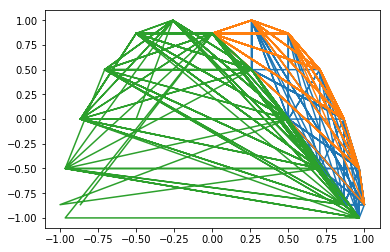

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_data['mnth_sin'], train_data['mnth_cos'])
plt.plot(train_data['day_sin'], train_data['day_cos'])
plt.plot(train_data['hr_sin'], train_data['hr_cos'])

In [219]:
train_data = train_data.drop(['Date', 'Time', 'Hour', 'Month', 'Weekday'], axis=1)

# # First Model
# train_data.to_csv("datasets/pre_encode.csv")

# Second Model
train_data.to_csv("datasets/pre_encode_values.csv")
train_data.head()

,Duration,Type,Call Status,Call Id,V_Range,mnth_sin,day_sin,hr_sin,mnth_cos,day_cos,hr_cos
18,285,Current Customer,Current Customer,1.033596e+09,1,0.258819,0.866025,-0.500000,0.500000,6.123234e-17,0.866025
40,84,Current Customer,Answering Service/Call Center,1.035662e+09,1,0.258819,0.965926,-0.258819,0.500000,-5.000000e-01,1.000000
53,950,Service,Existing Customer Prospect,1.048156e+09,0,0.866025,0.500000,-0.707107,-0.866025,8.660254e-01,0.500000
96,697,Current Customer,Current Customer,6.745030e+08,2,0.707107,0.000000,0.707107,0.500000,8.660254e-01,-0.500000
110,47,Other,Repeat Caller,6.745144e+08,2,0.707107,0.000000,0.707107,0.500000,8.660254e-01,-0.500000


## Preparing Data For Keras

One hot encoding

In [220]:
train_data['Type'] = 'type_' + train_data['Type'].astype(str)
train_data['Call Status'] = 'status_' + train_data['Call Status'].astype(str)
type_dummies = pd.get_dummies(train_data['Type'])
status_dummies = pd.get_dummies(train_data['Call Status'])
train_data = pd.concat([train_data, type_dummies], axis=1)
train_data = pd.concat([train_data, status_dummies], axis=1)
del train_data['Type']
del train_data['Call Status']

train_data.head()

,Duration,Call Id,V_Range,mnth_sin,day_sin,hr_sin,mnth_cos,day_cos,hr_cos,type_Current Customer,type_Other,type_Sales,type_Service,status_Answering Service/Call Center,status_Current Customer,status_Disconnected in Progress,status_Existing Customer Prospect,status_Left Message/Voice Mail,status_New Prospect,status_Other,status_Referral Prospect,status_Repeat Caller
18,285,1.033596e+09,1,0.258819,0.866025,-0.500000,0.500000,6.123234e-17,0.866025,1,0,0,0,0,1,0,0,0,0,0,0,0
40,84,1.035662e+09,1,0.258819,0.965926,-0.258819,0.500000,-5.000000e-01,1.000000,1,0,0,0,1,0,0,0,0,0,0,0,0
53,950,1.048156e+09,0,0.866025,0.500000,-0.707107,-0.866025,8.660254e-01,0.500000,0,0,0,1,0,0,0,1,0,0,0,0,0
96,697,6.745030e+08,2,0.707107,0.000000,0.707107,0.500000,8.660254e-01,-0.500000,1,0,0,0,0,1,0,0,0,0,0,0,0
110,47,6.745144e+08,2,0.707107,0.000000,0.707107,0.500000,8.660254e-01,-0.500000,0,1,0,0,0,0,0,0,0,0,0,0,1


## Importing Call Transcriptions

In [221]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
TRANS_PATH = "datasets/transcriptions.csv"

transcriptions = pd.read_csv(TRANS_PATH, error_bad_lines=False)
transcriptions.head()

,Unique Id,Call Id,Words,Unnamed: 3,Unnamed: 4
0,0,659725016,the great day for your service Leah speaking t...,NaN,NaN
1,1,659725016,what super super site that for the service it ...,NaN,NaN
2,2,659725016,the great day for your service Leah speaking t...,NaN,NaN
3,3,659725016,the great day for your service Leah speaking t...,NaN,NaN
4,4,659725016,the great day for your service Leah speaking t...,NaN,NaN


In [222]:
call_merged = pd.merge(train_data, transcriptions, how="inner", on=['Call Id'])
call_merged = call_merged.drop(['Unique Id', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
call_merged = call_merged.drop_duplicates(subset=['Call Id'], keep='first')


# Second Model
call_merged.to_csv("datasets/call_merged_values.csv")


In [223]:
# # First Model
# pre_train = pd.read_csv("datasets/call_merged.csv", error_bad_lines=False)

# Second Model
pre_train = pd.read_csv("datasets/call_merged_values.csv", error_bad_lines=False)
pre_train = pre_train.drop('Unnamed: 0', axis=1)
pre_train

,Duration,Call Id,V_Range,mnth_sin,day_sin,hr_sin,mnth_cos,day_cos,hr_cos,type_Current Customer,type_Other,type_Sales,type_Service,status_Answering Service/Call Center,status_Current Customer,status_Disconnected in Progress,status_Existing Customer Prospect,status_Left Message/Voice Mail,status_New Prospect,status_Other,status_Referral Prospect,status_Repeat Caller,Words
0,285,1.033596e+09,1,2.588190e-01,0.866025,-5.000000e-01,5.000000e-01,6.123234e-17,8.660254e-01,1,0,0,0,0,1,0,0,0,0,0,0,0,service Maria smile I'm a go ahead and put in ...
1,84,1.035662e+09,1,2.588190e-01,0.965926,-2.588190e-01,5.000000e-01,-5.000000e-01,1.000000e+00,1,0,0,0,1,0,0,0,0,0,0,0,0,Crown Services this is Britney Martin I believ...
2,950,1.048156e+09,0,8.660254e-01,0.500000,-7.071068e-01,-8.660254e-01,8.660254e-01,5.000000e-01,0,0,0,1,0,0,0,1,0,0,0,0,0,service mile money instead language people jus...
3,697,6.745030e+08,2,7.071068e-01,0.000000,7.071068e-01,5.000000e-01,8.660254e-01,-5.000000e-01,1,0,0,0,0,1,0,0,0,0,0,0,0,personally okay that's cool from Arby's her li...
4,47,6.745144e+08,2,7.071068e-01,0.000000,7.071068e-01,5.000000e-01,8.660254e-01,-5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,1,it's a great day service Maria speaking which ...
5,582,7.451496e+08,1,1.224647e-16,0.707107,5.000000e-01,8.660254e-01,5.000000e-01,-1.836970e-16,1,0,0,0,0,1,0,0,0,0,0,0,0,bumper vasectomy Style okay Play Store poker t...
6,579,7.426214e+08,1,1.224647e-16,0.000000,7.071068e-01,8.660254e-01,8.660254e-01,-5.000000e-01,0,0,1,0,0,0,0,0,0,1,0,0,0,Hi Sam how can I make you smile there so what ...
7,316,6.970606e+08,1,1.000000e+00,0.866025,7.071068e-01,-8.660254e-01,6.123234e-17,-5.000000e-01,1,0,0,0,0,1,0,0,0,0,0,0,0,I know
8,280,1.069012e+09,1,9.659258e-01,0.707107,5.000000e-01,-5.000000e-01,5.000000e-01,-1.836970e-16,0,0,0,1,0,0,0,1,0,0,0,0,0,hey Graham it's Maria speaking how to make a s...
9,243,7.037307e+08,1,9.659258e-01,0.866025,7.071068e-01,-1.000000e+00,6.123234e-17,-5.000000e-01,1,0,0,0,0,1,0,0,0,0,0,0,0,I'm pretty certain


#### tokenizer

In [235]:
import keras
from keras.preprocessing.text import Tokenizer
import keras.preprocessing.text as kpt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import json

transcriptions = pre_train['Words']

# create a tokenizer
t = Tokenizer(num_words=None, lower=True, split=' ')
# feed with transcriptions
t.fit_on_texts(transcriptions)

# # First Model
# # save dictionary in case we need it later
# dict = t.word_index
# with open('dict.json', 'w') as dictionary_file:
#     json.dump(dict, dictionary_file)

# Second Model
# save dictionary in case we need it later
dict = t.word_index
with open('dict_values.json', 'w') as dictionary_file:
    json.dump(dict, dictionary_file)

def convert_text_to_index_array(text):
    return [dict[word] for word in kpt.text_to_word_sequence(text)]

allWordIndices = []

# Changing each transcription to its tokenizer ID in word_index
for text in transcriptions:
    wordIndices = convert_text_to_index_array(text)
    allWordIndices.append(wordIndices)

# Cast as array    
allWordIndices = np.asarray(allWordIndices)

# call_merged['Words'] = t.sequences_to_matrix(allWordIndices, mode='binary')
train_x_words = t.sequences_to_matrix(allWordIndices, mode='binary')

# # First Model Output
# train_y = keras.utils.to_categorical(pre_train['Match'], 2)

# # Second Model Output
# train_y = np.asarray(pre_train['V_Range'])
# train_y
# train_y = keras.utils.to_categorical(pre_train_y, num_classes=2)
# train_y

encoder = LabelEncoder()
encoder.fit(pre_train['V_Range'])
encoded_Y = encoder.transform(pre_train['V_Range'])
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)
train_y

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [236]:
train_x_words.shape

(182, 2545)

#### incorporating other features

In [238]:
pre_train_other = pre_train.drop(['Words', 'Call Id', 'V_Range'], 1)
# call_merged_other['Call Id'] = pd.to_numeric(s, downcast='float')

train_x_other = pre_train_other.to_numpy()
train_x_other.shape

(182, 20)

#### Adding both training sets together

In [239]:
train_x = np.concatenate((train_x_other, train_x_words), axis=1)
train_x.shape

(182, 2565)

#### Scaling the data

In [240]:
# Standardize attribute data
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

# Define the scaler 
scaler = StandardScaler().fit(train_x)

# Scale the train set
train_x = scaler.transform(train_x)

# # First Model
# # Save the scaler
# joblib.dump(scaler, 'std_scaler.save')

# Second Model
joblib.dump(scaler, 'std_scaler_values.save')

['std_scaler_values.save']

## First Model - Conversion Probability

#### Define the model

In [244]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

# # First Model
# shape = np.size(train_x,1)
# model = Sequential()
# model.add(Dense(512, input_shape=(shape,), activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))

# Second Model
shape = np.size(train_x,1)
model = Sequential()
model.add(Dense(512, input_shape=(shape,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#things to change: neural network type, activation functions

#### Compile the model

In [245]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model

In [246]:
model.fit(train_x, train_y, batch_size=32, epochs=5, verbose=1, validation_split=0.1, shuffle=True)

Train on 163 samples, validate on 19 samples
Epoch 1/5
163/163 [==============================] - 2s 12ms/step - loss: 1.2893 - acc: 0.4479 - val_loss: 0.8583 - val_acc: 0.4737
Epoch 2/5
163/163 [==============================] - 0s 1ms/step - loss: 0.9965 - acc: 0.5337 - val_loss: 0.8172 - val_acc: 0.5263
Epoch 3/5
163/163 [==============================] - 0s 2ms/step - loss: 0.7986 - acc: 0.6626 - val_loss: 0.8663 - val_acc: 0.5263
Epoch 4/5
163/163 [==============================] - 0s 2ms/step - loss: 0.6059 - acc: 0.7485 - val_loss: 1.0376 - val_acc: 0.3684
Epoch 5/5
163/163 [==============================] - 0s 2ms/step - loss: 0.5134 - acc: 0.7914 - val_loss: 0.9211 - val_acc: 0.3684


#### Saving the Model

In [247]:
# basic_model.json & basic_model.h5: sub optimal transcriptions only

# # First Model
# # complete_model.json & complete_model.h5: all featuers including transcriptions but same settings as basic_model
# model_json = model.to_json()
# with open('complete_model.json', 'w') as json_file:
#     json_file.write(model_json)
    
# model.save_weights('complete_model.h5')

# Second Model
model_json = model.to_json()
with open('complete_model_values.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('complete_model_values.h5')


#### Testing the Model

In [248]:
import json
import numpy as np
import keras
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
from keras.models import model_from_json

labels = ['1','2','3']

# open up dictionary 
with open('dict_values.json', 'r') as dictionary_file:
    dict = json.load(dictionary_file)

# make sure that words are in dictionary
def convert_text_to_index_array2(text):
    words = kpt.text_to_word_sequence(text)
    wordIndices = []
    for word in words:
        if word in dict:
            wordIndices.append(dict[word])
    return wordIndices

# bring in saved model
json_file = open('complete_model_values.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# create model from this
model = model_from_json(loaded_model_json)
model.load_weights('complete_model_values.h5')

results = []

for s in train_x:
    pred = model.predict(np.asmatrix(s))
    results.append(labels[np.argmax(pred)])
    print((labels[np.argmax(pred)], pred[0][np.argmax(pred)]*100))

# print(score)

# # testing model using train_x
# for s in np.nditer(train_x):
#     pred = model.predict(s)
#     print((labels[np.argmax(pred)], pred[0][np.argmax(pred)]*100))

# # testing transcriptions 
# for s in transcriptions:    
#     test_tr = convert_text_to_index_array2(tr)
#     input = t.sequences_to_matrix([test_tr], mode='binary')
#     # predict 
#     pred = model.predict(input)
#     print((labels[np.argmax(pred)], pred[0][np.argmax(pred)]*100))
#     # print("% lead: %f%% confidence" (labels[np.argmax(pred)], pred[0][np.argmax(pred)]*100))

('2', 96.9481110572815)
('2', 91.67391657829285)
('1', 91.68128371238708)
('3', 69.29299831390381)
('2', 46.91614806652069)
('2', 96.20298743247986)
('2', 77.50266790390015)
('2', 49.624818563461304)
('2', 92.77243614196777)
('2', 62.3441219329834)
('2', 67.38252639770508)
('2', 96.2013304233551)
('2', 53.05120348930359)
('2', 94.63338255882263)
('2', 67.08873510360718)
('2', 48.993515968322754)
('2', 78.80270481109619)
('3', 88.55600357055664)
('2', 57.832467555999756)
('2', 83.713698387146)
('2', 84.7534716129303)
('1', 97.16559648513794)
('1', 98.51641654968262)
('2', 97.1068263053894)
('1', 96.36095762252808)
('3', 85.88215112686157)
('1', 48.474130034446716)
('1', 90.8423125743866)
('1', 98.01454544067383)
('1', 98.38232398033142)
('1', 98.93580079078674)
('1', 59.075891971588135)
('3', 81.02070093154907)
('3', 82.26181864738464)
('2', 95.90342044830322)
('2', 98.25710654258728)
('2', 59.565556049346924)
('1', 51.03045105934143)
('2', 49.59713816642761)
('2', 93.70601177215576)
('

#### Evaluate Model

In [249]:
# basic evaluation 

actual = pre_train['V_Range']

y = 0 
n = 0

for i, r in enumerate(actual):
#     print((results[i]),(r))
    if(int(results[i]) == int(r)):
        y=y+1
    else:
        n=n+1

print(y/(y+n))

# actual evaluation

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(train_x, train_y, verbose=1)
print(score)

0.06043956043956044
182/182 [==============================] - 0s 2ms/step
[0.384438286115835, 0.8791208807583694]
